In [13]:
import numpy as np
import matplotlib.pyplot as plt
import trackpy as tp
from parameter_estimation import plot_parameter
from tracking import batch, track
from scipy.signal import butter, lfilter

<Figure size 640x480 with 0 Axes>

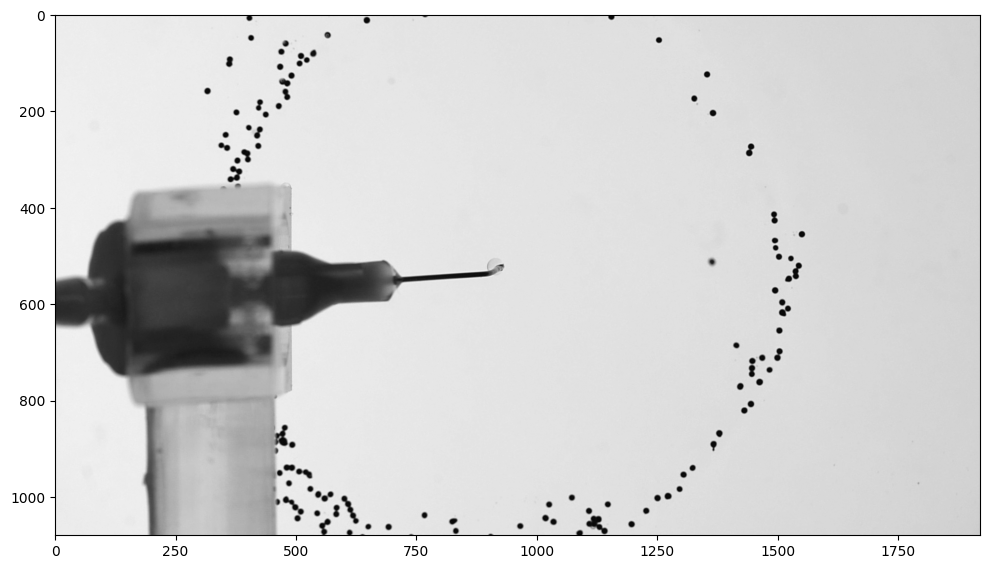

<Figure size 640x480 with 0 Axes>

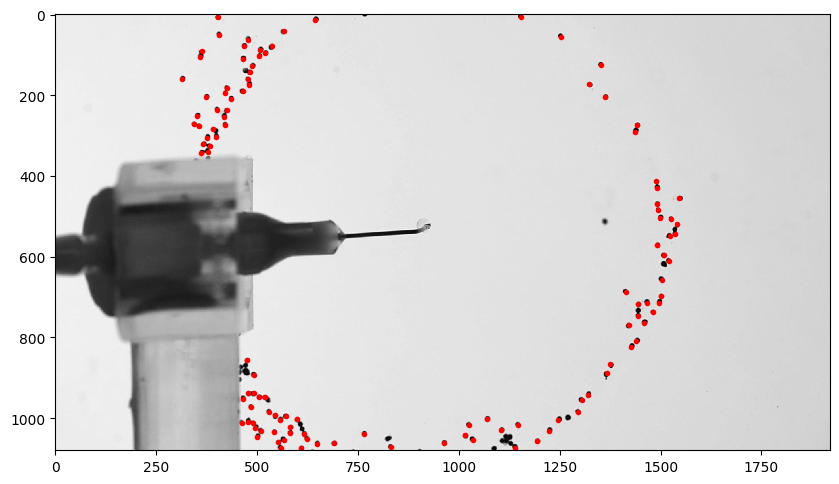

c:\Users\escud\Desktop\Marangoni\Code\marangoni-spreading\.venv\Lib\site-packages\trackpy\plots.py:638: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  axlist = f[pos_columns].applymap(lambda x: x % 1).hist()


<Figure size 640x480 with 0 Axes>

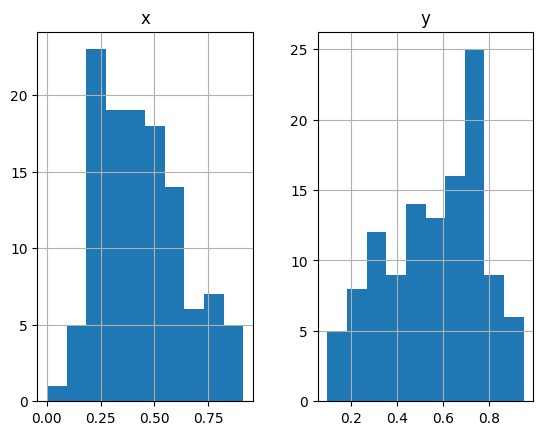

In [5]:
directory = "C:/Users/escud/Desktop/Marangoni/Videos/0225-Experiments/H=4cm_frames/"
last_frame = 200 # 640 is max for this video
diameter = 11
mass = 2200

frames = plot_parameter(directory, particle_diameter=diameter, particle_minmass=mass, frame_number=last_frame)

In [7]:
output_path = "C:/Users/escud/Desktop/Marangoni/Videos/0225-Experiments/H=4cm_frames_output/"
f = batch(frames[:last_frame], particle_diameter=diameter, particle_minmass=mass, save_video=False, output_path=output_path)

Frame 199: 118 features


Frame 199: 118 trajectories present.


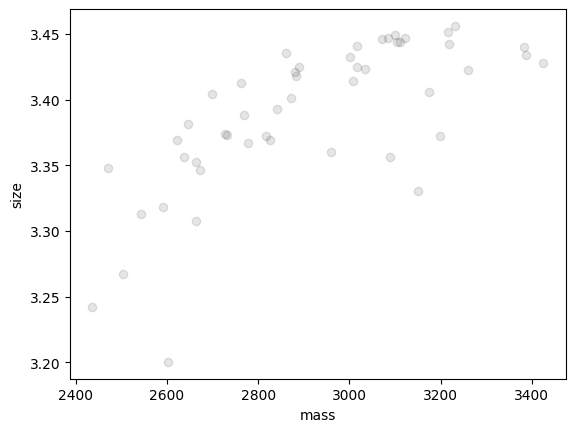

<Figure size 640x480 with 0 Axes>

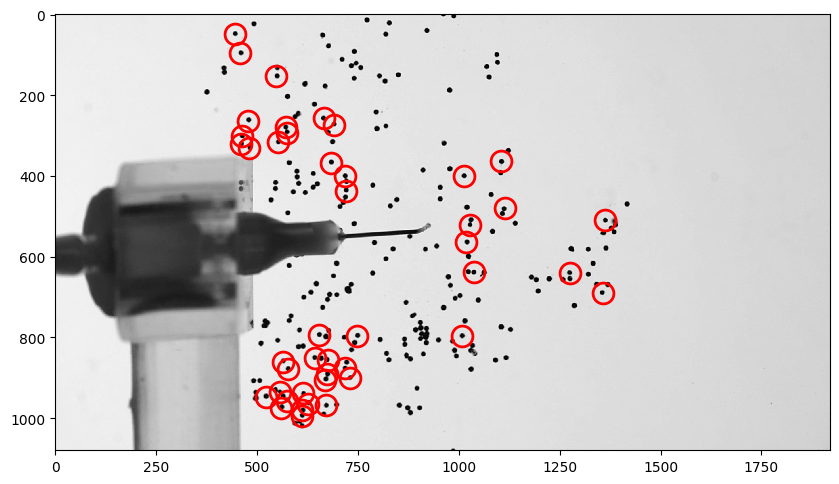

No-filter: 1300
Pre-filter: 49
Filter: 49


In [8]:
status = False
filtered_trajectories = track(batched_frames=f, frames=frames[:last_frame], particle_diameter=diameter, particle_minmass=mass, filter_frame_number=(len(frames[:last_frame]) // 1), save_video=status, output_path=output_path)

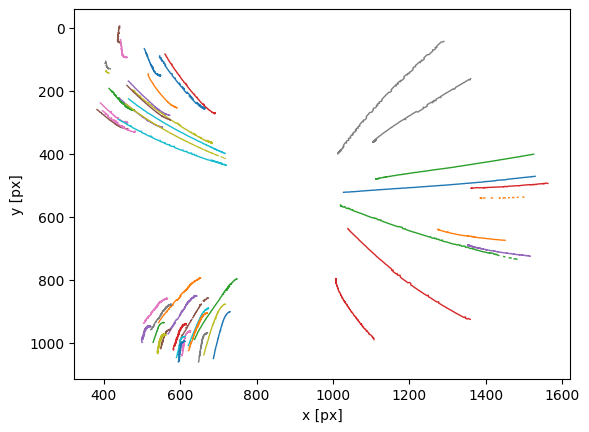

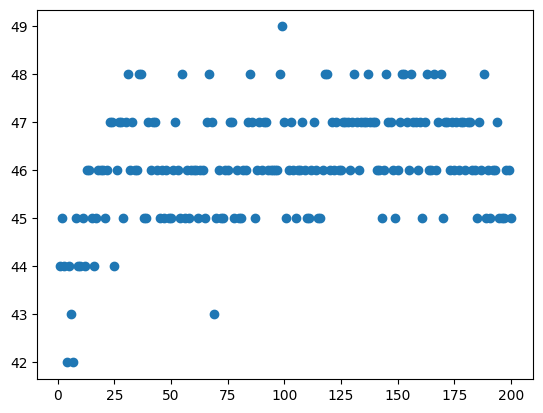

In [50]:
d = tp.compute_drift(filtered_trajectories)
tm = tp.subtract_drift(filtered_trajectories.copy(), d)
ax = tp.plot_traj(tm)
plt.show()

particles_per_frame = tm['frame'].value_counts().sort_index()
frame_number_array = np.linspace(1, len(particles_per_frame), len(particles_per_frame))
y_arr = tm['frame'].value_counts().sort_index()
plt.scatter(frame_number_array, y_arr)

Total trajectories found: 49


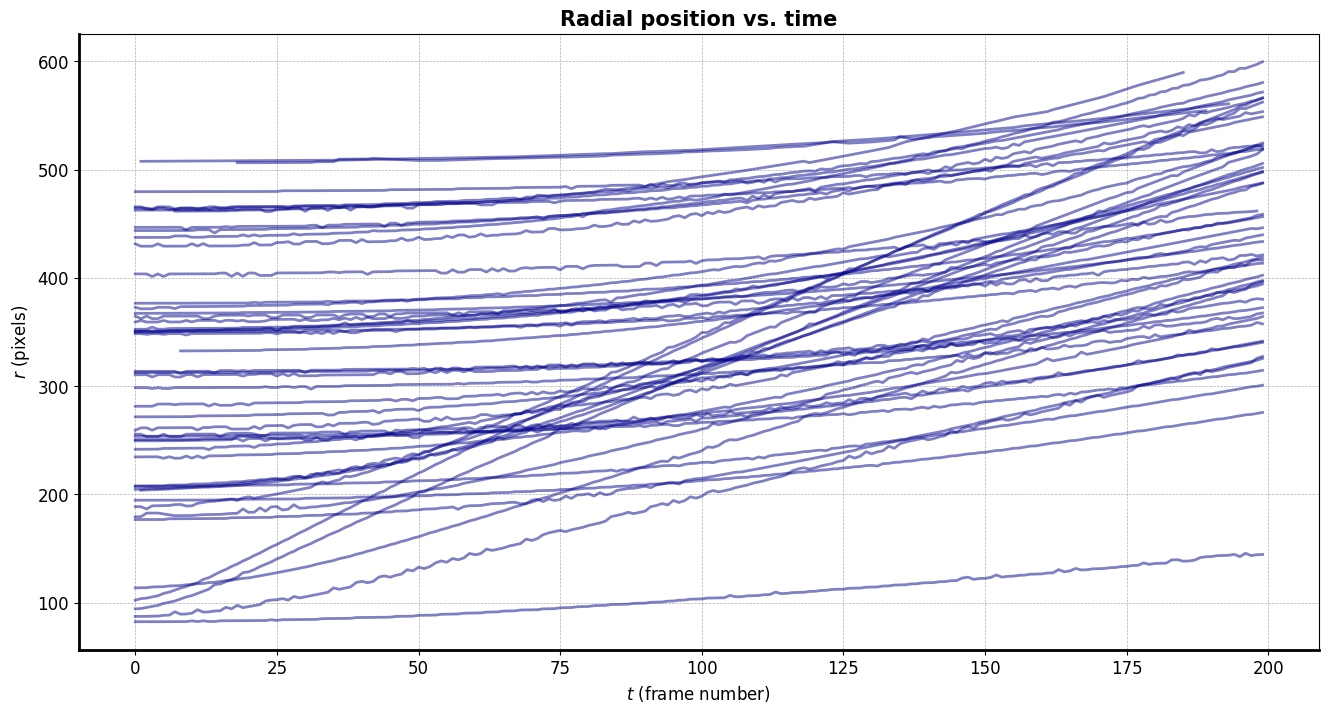

In [66]:
r_array_per_particle = []
x_c = 925 # determine empirically with ImageJ
y_c = 524 # determine empirically with ImageJ

# Group the DataFrame by the 'particle' column
for particle, group in filtered_trajectories.groupby('particle'):
    # Sort by frame to maintain the time order
    group_sorted = group.sort_values('frame')
    # Create a list of (x, y) tuples for the particle
    positions = list(zip(np.sqrt((group_sorted['x'] - x_c)**2, (group_sorted['y'] - y_c)**2), group_sorted['frame']))
    r_array_per_particle.append(positions)


plt.figure(figsize=(16, 8))

# Loop over each particle's data
for idx, particle_data in enumerate(r_array_per_particle):
    # Unzip the list of tuples into two separate lists:
    # r_values holds the radial positions (first element of each tuple)
    # frames holds the corresponding frame numbers (second element)
    if particle_data:  # Check if the list is not empty
        r_values, frames = zip(*particle_data)
        
        # Plot the radial positions against the frame numbers for this particle
        plt.plot(frames, r_values, label=f'Particle {idx}', color="darkblue", alpha=0.5, linewidth=2)
    
plt.xlabel(r'$t$ (frame number)', fontsize=12)
plt.ylabel(r'$r$ (pixels)', fontsize=12)
plt.title('Radial position vs. time', fontsize=15, fontweight='bold')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

print(f'Total trajectories found: {len(r_array_per_particle)}')

In [42]:
def position_speed(position_array):
    speed_array = []
    for i in range(len(position_array) - 1):
        interim = []
        for j in range(len(position_array[i])):
            interim.append(position_array[i + 1][j] - position_array[i][j])
        speed_array.append(interim)
    return speed_array

speed_array = position_speed(r_array)
selection = np.linspace(40, counter_array[-3], 5, dtype=int)

plt.figure(figsize=(16, 8))
for i in selection:
    plt.scatter(r_array[i], speed_array[i], label='t = ' + str(i) + ' frames')
plt.legend()


plt.xlabel(r'$r$ (pixels)', fontsize=12)
plt.ylabel(r'$u_s$ (pixels/frame)', fontsize=12)
plt.title('Interface velocity vs. radial position', fontsize=15, fontweight='bold')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# figure_directory = "C:/Users/escud/Desktop/Marangoni/Figures/D=60mm/"
# plt.savefig(figure_directory + "Speed_vs_radius_96_particles.jpeg", dpi=500, format='jpeg')
plt.show()

IndexError: list index out of range